### Confidence intervel

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'C:\Users\SRIKANTH ADIPIREDDY\Desktop\VS Code\ANOVA\BEML_lyst1729240526796.csv')

In [4]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.00,1151.00,1121.00,1134.00,1135.60,101651.0,1157.18
1,2010-01-05,1146.80,1149.00,1128.75,1135.00,1134.60,59504.0,676.47
2,2010-01-06,1140.00,1164.25,1130.05,1137.00,1139.60,128908.0,1482.84
3,2010-01-07,1142.00,1159.40,1119.20,1141.00,1144.15,117871.0,1352.98
4,2010-01-08,1156.00,1172.00,1140.00,1141.20,1144.05,170063.0,1971.42
...,...,...,...,...,...,...,...,...
1734,2016-12-26,965.00,965.05,935.00,950.10,950.25,398696.0,3783.63
1735,2016-12-27,960.70,989.00,952.35,974.00,975.70,808561.0,7885.14
1736,2016-12-28,980.75,985.00,970.15,977.00,974.40,367041.0,3592.49
1737,2016-12-29,977.10,997.95,974.55,985.15,986.05,555233.0,5489.14


In [5]:
data.shape

(1739, 8)

In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1739.000000,1739.000000,1739.000000,1739.000000,1739.000000,1.739000e+03,1739.000000
mean,700.233180,713.384704,686.280276,698.413370,698.435221,2.352309e+05,1682.773985
std,358.658024,364.165083,351.554420,357.358712,357.429870,3.561114e+05,2705.430289
min,129.300000,133.500000,106.000000,128.900000,129.150000,2.441000e+03,16.130000
25%,371.025000,379.300000,367.525000,370.550000,370.650000,5.878150e+04,263.160000
50%,685.000000,699.800000,666.750000,683.000000,682.150000,1.282050e+05,678.090000
75%,1012.000000,1027.800000,997.000000,1011.200000,1010.550000,2.513440e+05,1956.530000
max,1569.800000,1612.000000,1540.250000,1555.850000,1558.500000,3.720854e+06,26358.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1739 non-null   object 
 1   Open                  1739 non-null   float64
 2   High                  1739 non-null   float64
 3   Low                   1739 non-null   float64
 4   Last                  1739 non-null   float64
 5   Close                 1739 non-null   float64
 6   Total Trade Quantity  1739 non-null   float64
 7   Turnover (Lacs)       1739 non-null   float64
dtypes: float64(7), object(1)
memory usage: 108.8+ KB


In [8]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [9]:
data=data[['Date','Close']]

In [10]:
data.set_index(data['Date'])

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


In [ ]:
data.index

RangeIndex(start=0, stop=1739, step=1)

In [ ]:
data.set_index(pd.DatetimeIndex(data['Date']))

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [ ]:
data['gain'] = data['Close'].pct_change(periods=1)

C:\Users\SRIKANTH ADIPIREDDY\AppData\Local\Temp\ipykernel_21912\3645438420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gain'] = data['Close'].pct_change(periods=1)


In [ ]:
data.drop(columns='Date',axis=1)

,Close,gain
0,1135.60,NaN
1,1134.60,-0.000881
2,1139.60,0.004407
3,1144.15,0.003993
4,1144.05,-0.000087
...,...,...
1734,950.25,-0.021924
1735,975.70,0.026782
1736,974.40,-0.001332
1737,986.05,0.011956


In [ ]:
data

,Date,Close,gain
0,2010-01-04,1135.60,NaN
1,2010-01-05,1134.60,-0.000881
2,2010-01-06,1139.60,0.004407
3,2010-01-07,1144.15,0.003993
4,2010-01-08,1144.05,-0.000087
...,...,...,...
1734,2016-12-26,950.25,-0.021924
1735,2016-12-27,975.70,0.026782
1736,2016-12-28,974.40,-0.001332
1737,2016-12-29,986.05,0.011956


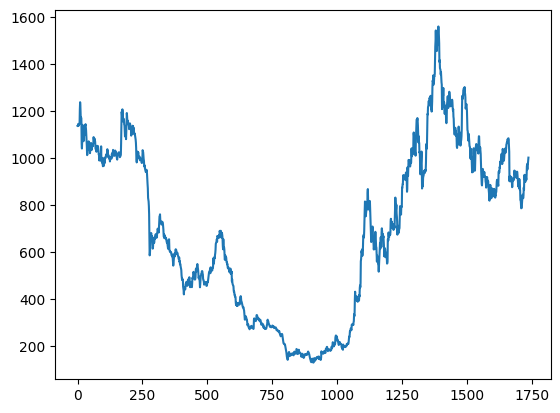

In [ ]:
plt.plot(data["Close"])

C:\Users\SRIKANTH ADIPIREDDY\AppData\Local\Temp\ipykernel_21912\896739247.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["gain"])


<Axes: xlabel='gain', ylabel='Density'>

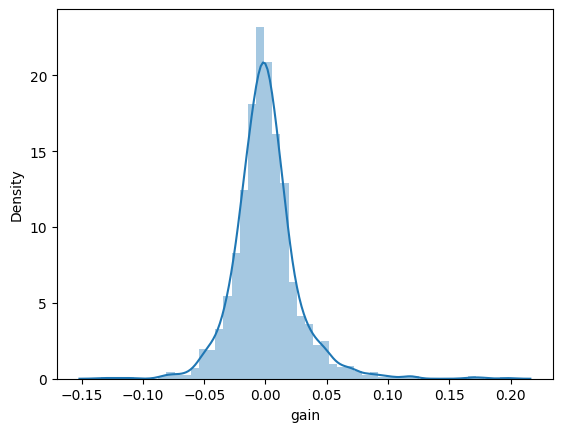

In [ ]:
sns.distplot(data["gain"])

In [ ]:
data.gain.describe()

count    1738.000000
mean        0.000271
std         0.026431
min        -0.133940
25%        -0.013736
50%        -0.001541
75%         0.011985
max         0.198329
Name: gain, dtype: float64

### confidence intervel 
* x_bar + or _ z . std/no of observation

In [ ]:
from scipy import stats

In [ ]:
data_CI = stats.norm.interval(0.95,loc=data['gain'].mean(),scale=data['gain'].std())

In [ ]:
data_CI

(np.float64(-0.05153272968060142), np.float64(0.05207422583871589))

C:\Users\SRIKANTH ADIPIREDDY\AppData\Local\Temp\ipykernel_21912\1186525914.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['gain']);


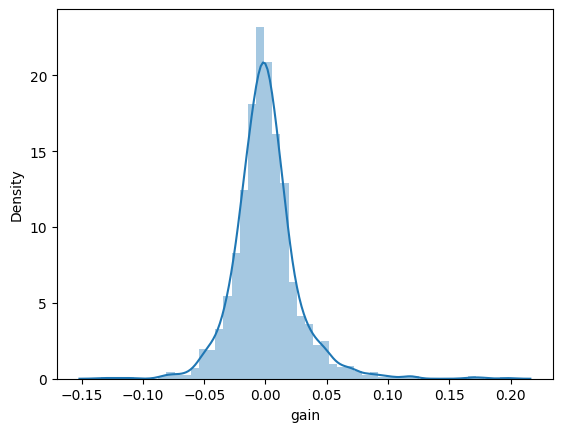

In [ ]:
sns.distplot(data['gain']);

*  -0.5 and 0.5 we are confident about going to invest 

### Z- test
* z = x-population mean/(sample std/root(no of sample))
* - when we want to find the value pf population mean, when the varian=cr is known 
* - Acceptance and rejection region or value of hypothesis
* - when ever the sample is large then 30 or equal and variance is known we acn that stats parameter for population can be know the help pf xz test
* - it is only work when the data is know std population

### case study:
* - a passport offfice claims thet they create the passport within 30 days of filling the application run the hypothesis test to check the clim of the company std=12.5, significance level = 0.05?

 - null hypothesis is          : HO > 30
 - alternative hypothesis is   : H1 < 30


In [12]:
data_df = pd.read_csv(r"C:\Users\SRIKANTH ADIPIREDDY\Desktop\VS Code\ANOVA\passport_lyst1729241000102.csv")

In [13]:
data_df

,Unnamed: 0,Processing_time
0,0,16.0
1,1,16.0
2,2,30.0
3,3,37.0
4,4,25.0
5,5,22.0
6,6,19.0
7,7,35.0
8,8,27.0
9,9,32.0


In [14]:
data_df.columns

Index(['Unnamed: 0', 'Processing_time'], dtype='object')

In [15]:
data_df.drop('Unnamed: 0',axis=1)

,Processing_time
0,16.0
1,16.0
2,30.0
3,37.0
4,25.0
5,22.0
6,19.0
7,35.0
8,27.0
9,32.0


C:\Users\SRIKANTH ADIPIREDDY\AppData\Local\Temp\ipykernel_10712\2233224872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['Processing_time'])


<Axes: xlabel='Processing_time', ylabel='Density'>

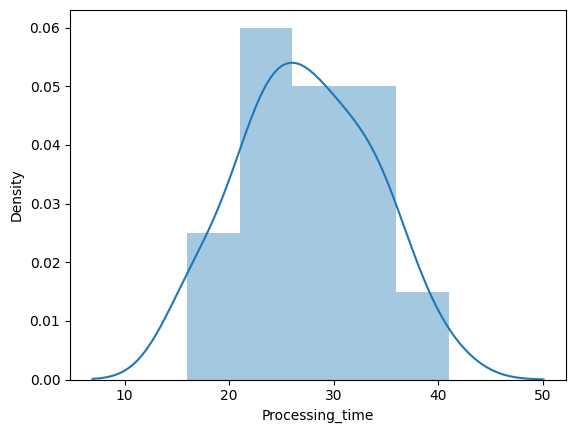

In [16]:
sns.distplot(data_df['Processing_time'])

In [20]:
import math
from scipy import stats

def Z_test(population_mean ,population_std,sample):
    z = (sample.mean() - population_mean)/(population_std/math.sqrt(len(sample)))
    return z ,stats.norm.cdf(z)

In [21]:
Z_test(30,12.5,data_df['Processing_time'])

(np.float64(-1.3661039491927396), np.float64(0.08595316947180132))

#### since we acn see the value of p is greater then 0.05 which is 0.8 we are going to accept the null hypothesis and going to reject the alternative  one 